In [107]:
import numpy as np
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
from scipy.signal import find_peaks
import hvplot.dask

In [2]:
pbar = ProgressBar()
pbar.register()
n_partition = 200

[########################################] | 100% Completed | 108.73 ms
3


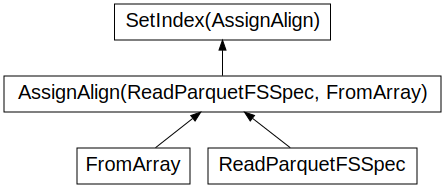

In [106]:
data = dd.read_parquet('test.parquet')

s = data.shape
index = np.arange(s[0].compute(), dtype=np.uint32)#data = data.reset_index(drop=True)

data['index'] = dd.from_array(index)
data = data.set_index('index')

print(data.npartitions)
data.visualize()

In [116]:
print(f'Estimated total memory usage: {((data.memory_usage().sum().compute())/(1024**3)):.3f} GByte')

[########################################] | 100% Completed | 213.93 ms
Estimated total memory usage: 0.004 GByte


In [83]:
print(data)

Dask DataFrame Structure:
              port_1_p(bar) port_2_p(bar) port_3_p(bar) port_4_p(bar) support_p(bar) tank_p(bar) temp(c) time(hour)
npartitions=3                                                                                                      
0                   float32       float32       float32       float32        float32     float32   uint8    float32
38387                   ...           ...           ...           ...            ...         ...     ...        ...
75230                   ...           ...           ...           ...            ...         ...     ...        ...
119999                  ...           ...           ...           ...            ...         ...     ...        ...
Dask Name: setindex, 4 expressions
Expr=SetIndex(frame=AssignAlign(frame=ReadParquetFSSpec(4bc54e2), column='index', value=FromArray(6dbb109)), _other='index', options={})


In [50]:
data.head()

[########################################] | 100% Completed | 115.86 ms


,port_1_p(bar),port_2_p(bar),port_3_p(bar),port_4_p(bar),support_p(bar),tank_p(bar),temp(c),time(hour)
index,,,,,,,,
0,0.55,12.29,12.42,0.53,12.37,0.53,48,0.000000
1,0.55,12.32,12.45,0.55,12.37,0.54,48,0.000003
2,0.54,12.31,12.43,0.54,12.35,0.54,48,0.000006
3,0.58,12.32,12.43,0.54,12.38,0.55,48,0.000008
4,0.55,12.30,12.43,0.54,12.36,0.55,48,0.000011


In [51]:
data.tail()

[########################################] | 100% Completed | 106.00 ms


,port_1_p(bar),port_2_p(bar),port_3_p(bar),port_4_p(bar),support_p(bar),tank_p(bar),temp(c),time(hour)
index,,,,,,,,
119995,13.04,0.61,0.79,20.170000,39.560001,0.66,48,0.333319
119996,11.99,0.57,0.74,20.500000,39.560001,0.63,48,0.333322
119997,10.89,0.55,0.77,20.709999,39.180000,0.65,48,0.333325
119998,9.86,0.62,0.82,20.940001,39.099998,0.71,48,0.333328
119999,8.73,0.67,0.83,21.480000,39.259998,0.72,48,0.333331


In [108]:
hvplot.extension('bokeh')

data.hvplot.line(x='time(hour)', y='port_1_p(bar)', rasterize=True)

ImportError: In order to use datashading features the Datashader library must be available. It can be installed with:
  conda install datashader

[########################################] | 100% Completed | 110.60 ms


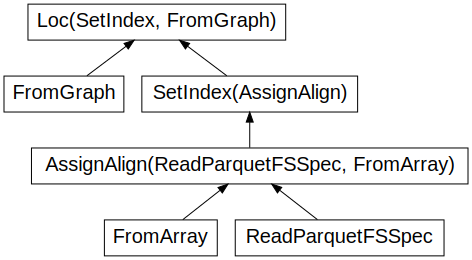

In [123]:
peaks, _ = find_peaks(data['port_1_p(bar)'], height=10, distance=100*10)
p1_peak = data.loc[data.index.isin(peaks)]
p1_peak.visualize()

In [119]:
p1_peak.head()

[########################################] | 100% Completed | 230.19 ms


,port_1_p(bar),port_2_p(bar),port_3_p(bar),port_4_p(bar),support_p(bar),tank_p(bar),temp(c),time(hour)
index,,,,,,,,
778,23.049999,1.37,1.49,9.28,40.369999,1.36,48,0.002161
1801,23.049999,1.48,1.62,11.31,38.959999,1.49,48,0.005003
3116,23.110001,1.50,1.60,10.48,38.740002,1.54,48,0.008656
4545,23.040001,1.40,1.59,10.82,38.939999,1.46,48,0.012625
5668,23.059999,1.40,1.56,11.29,39.060001,1.43,48,0.015744


In [120]:
p1_peak.tail()

[########################################] | 100% Completed | 335.07 ms


,port_1_p(bar),port_2_p(bar),port_3_p(bar),port_4_p(bar),support_p(bar),tank_p(bar),temp(c),time(hour)
index,,,,,,,,
114627,22.969999,0.78,0.89,0.89,39.450001,0.77,48,0.318408
115846,23.100000,0.83,0.98,0.99,38.830002,0.87,48,0.321794
116856,22.900000,0.83,0.94,0.92,39.209999,0.85,48,0.324600
117969,22.980000,0.82,0.86,0.87,38.910000,0.80,48,0.327692
119778,23.160000,0.90,1.09,1.06,39.080002,0.97,48,0.332717


In [121]:
p1_peak.describe().compute()

[########################################] | 100% Completed | 329.23 ms


,port_1_p(bar),port_2_p(bar),port_3_p(bar),port_4_p(bar),support_p(bar),tank_p(bar),temp(c),time(hour)
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90,90.000000
mean,23.056665,0.952444,1.046000,2.156333,39.157221,0.947111,47.755556,0.170033
std,0.115554,0.526358,0.196376,3.259490,0.431514,0.190105,0.432165,0.098239
min,22.760000,0.680000,0.830000,0.770000,37.389999,0.730000,47,0.002161
25%,23.020000,0.790000,0.950000,0.915000,39.014999,0.845000,48.0,0.076649
50%,23.090000,0.855000,0.980000,0.990000,39.230000,0.900000,48.0,0.162731
75%,23.160000,0.920000,1.040000,0.995000,39.445000,0.940000,48.0,0.242906
max,23.340000,5.530000,1.620000,11.570000,40.369999,1.540000,48,0.332717


In [122]:
hvplot.extension('bokeh')

p1_peak.hvplot.scatter(x='time(hour)', y=['port_1_p(bar)'], title='peak pressure', xlabel='time(hour)', ylabel='pressure(bar)', ylim=(0, 25), rasterize=False, width=1920, height=1080, grid=True,
                       fontsize={'title':'20pt', 'labels': '20pt', 'xticks': '15pt', 'yticks': '15pt'}, colorbar=False)

[########################################] | 100% Completed | 224.20 ms
[########################################] | 100% Completed | 226.04 ms
[########################################] | 100% Completed | 216.44 ms
[########################################] | 100% Completed | 218.91 ms
[########################################] | 100% Completed | 223.86 ms
[########################################] | 100% Completed | 227.12 ms


:Scatter   [time(hour)]   (port_1_p(bar))